In [1]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd

import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
import cartopy.feature as feature

## Get data!
It's hourly PM10 data of July 2022.

In [2]:
path = '/home/cshu2/clim680/'
fname = 'newPM_202207.nc'
ds = xr.open_dataset(path+fname)
ds

<xarray.Dataset>
Dimensions:  (day: 31, time: 24, lat: 351, lon: 801)
Coordinates:
  * day      (day) int32 1 2 3 4 5 6 7 8 9 10 ... 22 23 24 25 26 27 28 29 30 31
  * time     (time) int32 1 2 3 4 5 6 7 8 9 10 ... 15 16 17 18 19 20 21 22 23 24
  * lat      (lat) float32 15.0 15.1 15.2 15.3 15.4 ... 49.6 49.7 49.8 49.9 50.0
  * lon      (lon) float32 -130.0 -129.9 -129.8 -129.7 ... -50.2 -50.1 -50.0
Data variables:
    PM10     (day, time, lat, lon) float32 ...
    PM25     (day, time, lat, lon) float32 ...

In [3]:
fname1 = 'newPM_202201.nc'
ds1 = xr.open_dataset(path+fname1)
ds1

<xarray.Dataset>
Dimensions:  (day: 31, time: 24, lat: 351, lon: 801)
Coordinates:
  * day      (day) int32 1 2 3 4 5 6 7 8 9 10 ... 22 23 24 25 26 27 28 29 30 31
  * time     (time) int32 1 2 3 4 5 6 7 8 9 10 ... 15 16 17 18 19 20 21 22 23 24
  * lat      (lat) float32 15.0 15.1 15.2 15.3 15.4 ... 49.6 49.7 49.8 49.9 50.0
  * lon      (lon) float32 -130.0 -129.9 -129.8 -129.7 ... -50.2 -50.1 -50.0
Data variables:
    PM10     (day, time, lat, lon) float32 ...
    PM25     (day, time, lat, lon) float32 ...

## Make diurnal mean of the whole month

In [4]:
ds_climo = ds.groupby('time').mean('day')
ds_climo

<xarray.Dataset>
Dimensions:  (time: 24, lat: 351, lon: 801)
Coordinates:
  * time     (time) int32 1 2 3 4 5 6 7 8 9 10 ... 15 16 17 18 19 20 21 22 23 24
  * lat      (lat) float32 15.0 15.1 15.2 15.3 15.4 ... 49.6 49.7 49.8 49.9 50.0
  * lon      (lon) float32 -130.0 -129.9 -129.8 -129.7 ... -50.2 -50.1 -50.0
Data variables:
    PM10     (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    PM25     (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

In [5]:
ds_climo1 = ds1.groupby('time').mean('day')
ds_climo1

<xarray.Dataset>
Dimensions:  (time: 24, lat: 351, lon: 801)
Coordinates:
  * time     (time) int32 1 2 3 4 5 6 7 8 9 10 ... 15 16 17 18 19 20 21 22 23 24
  * lat      (lat) float32 15.0 15.1 15.2 15.3 15.4 ... 49.6 49.7 49.8 49.9 50.0
  * lon      (lon) float32 -130.0 -129.9 -129.8 -129.7 ... -50.2 -50.1 -50.0
Data variables:
    PM10     (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    PM25     (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

## Create a "Climate index" using area mean of the values

In [6]:
ds_index = ds_climo.groupby('time').mean('lon').mean('lat')
ds_index

<xarray.Dataset>
Dimensions:  (time: 24)
Coordinates:
  * time     (time) int32 1 2 3 4 5 6 7 8 9 10 ... 15 16 17 18 19 20 21 22 23 24
Data variables:
    PM10     (time) float32 10.69 9.676 8.808 8.237 ... 10.95 11.18 11.28 11.17
    PM25     (time) float32 4.877 4.471 4.115 3.889 ... 4.745 4.877 4.971 4.999

In [7]:
ds_index1 = ds_climo1.groupby('time').mean('lon').mean('lat')
ds_index1

<xarray.Dataset>
Dimensions:  (time: 24)
Coordinates:
  * time     (time) int32 1 2 3 4 5 6 7 8 9 10 ... 15 16 17 18 19 20 21 22 23 24
Data variables:
    PM10     (time) float32 8.477 8.483 8.46 8.37 ... 8.732 8.67 8.624 8.603
    PM25     (time) float32 4.534 4.536 4.499 4.407 ... 4.722 4.691 4.668 4.658

In [8]:
print(ds_index['PM10'][:])

<xarray.DataArray 'PM10' (time: 24)>
array([10.689802 ,  9.676342 ,  8.8078575,  8.236869 ,  7.789201 ,
        7.467091 ,  7.250567 ,  7.073143 ,  6.930092 ,  6.8436356,
        6.8242764,  6.898916 ,  7.118757 ,  7.520544 ,  8.104908 ,
        8.769365 ,  9.383285 ,  9.906537 , 10.314556 , 10.65295  ,
       10.95245  , 11.176342 , 11.279921 , 11.171607 ], dtype=float32)
Coordinates:
  * time     (time) int32 1 2 3 4 5 6 7 8 9 10 ... 15 16 17 18 19 20 21 22 23 24


## See how the index varies with time and the index range

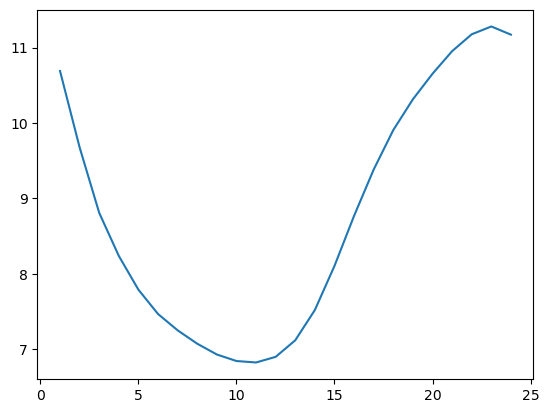

In [9]:
plt.plot(ds_index['time'],ds_index['PM10'][:]) 

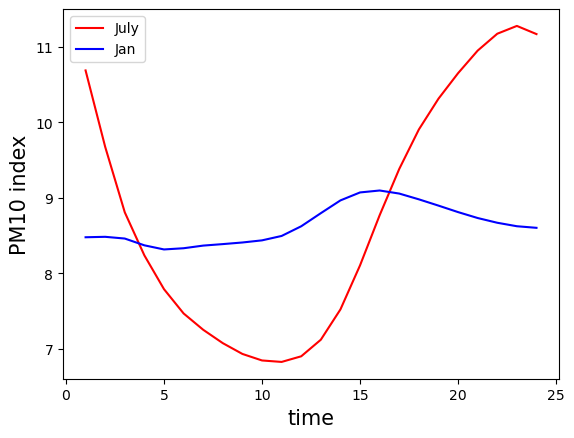

In [10]:
plt.plot(ds_index['time'],ds_index['PM10'][:],c='r',label='July')
plt.plot(ds_index['time'],ds_index1['PM10'][:],c='b',label='Jan')
plt.legend()
plt.xlabel('time',fontsize=15)
plt.ylabel('PM10 index',fontsize=15)
plt.show()

## Choose 7 and 10 to be the thresholds of "medium" and "high"

In [11]:
high   = ds_index['PM10'][:].where(ds_index['PM10'][:]>=10) 
medium = ds_index['PM10'][:].where((ds_index['PM10'][:]<10)&(ds_index['PM10'][:]>7))
low    = ds_index['PM10'][:].where(ds_index['PM10'][:]<= 7)

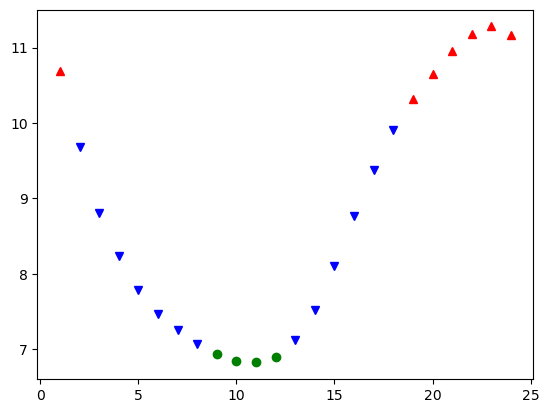

In [12]:
plt.plot(ds_index['time'],high,  'r^')
plt.plot(ds_index['time'],medium,'bv')
plt.plot(ds_index['time'],low,   'go') 

In [13]:
print('High: '  ,high.count(dim='time').values)
print('Medium: ',medium.count(dim='time').values)
print('Low: '   ,low.count(dim='time').values)

counts=[high.count(dim='time').values,
        medium.count(dim='time').values,
        low.count(dim='time').values,
        ]
print(counts)

High:  7
Medium:  13
Low:  4
[array(7), array(13), array(4)]


In [14]:
ds_climo

<xarray.Dataset>
Dimensions:  (time: 24, lat: 351, lon: 801)
Coordinates:
  * time     (time) int32 1 2 3 4 5 6 7 8 9 10 ... 15 16 17 18 19 20 21 22 23 24
  * lat      (lat) float32 15.0 15.1 15.2 15.3 15.4 ... 49.6 49.7 49.8 49.9 50.0
  * lon      (lon) float32 -130.0 -129.9 -129.8 -129.7 ... -50.2 -50.1 -50.0
Data variables:
    PM10     (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    PM25     (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

### Drop all the layers excpt for layer0 because we only need ground data (deleted becuse I modifled the dataset)

In [15]:
#ds_climo=ds_climo.isel(lay=0)
#ds_climo

In [16]:
#ds_climo.drop_vars('lay')
#ds_climo

### Composites of diurnal mean on different area mean levels

In [17]:
high_PM   = ds_climo.sel(time=high.dropna(dim='time')['time']).mean(dim='time')
medium_PM = ds_climo.sel(time=medium.dropna(dim='time')['time']).mean(dim='time')
low_PM    = ds_climo.sel(time=low.dropna(dim='time')['time']).mean(dim='time')

comp_PM = [high_PM['PM10'],medium_PM['PM10'],low_PM['PM10']]
comp_PM

[<xarray.DataArray 'PM10' (lat: 351, lon: 801)>
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
 Coordinates:
   * lat      (lat) float32 15.0 15.1 15.2 15.3 15.4 ... 49.6 49.7 49.8 49.9 50.0
   * lon      (lon) float32 -130.0 -129.9 -129.8 -129.7 ... -50.2 -50.1 -50.0,
 <xarray.DataArray 'PM10' (lat: 351, lon: 801)>
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
 Coordinates:
   * lat      (lat) float32 15.0 15.1 15.2 15.3 15.4 ... 49.6 49.7 49.8 49.9 50.0
   * lon      (lon) float32 -130.0 

In [18]:
import matplotlib.colors as colors
import cartopy.feature as cfeature
import matplotlib

# Make the figure larger
fig = plt.figure(figsize=(11,6.5))

from matplotlib.cm import ScalarMappable

clevs = [0,4,8,12,16,20,30,40,60,80,100,200,500,1000]
colorslist = ['white','blue','green','yellow','red']
colormap = colors.LinearSegmentedColormap.from_list('123',colorslist,N=13)

norm = matplotlib.colors.BoundaryNorm(clevs,len(clevs))


<Figure size 1100x650 with 0 Axes>

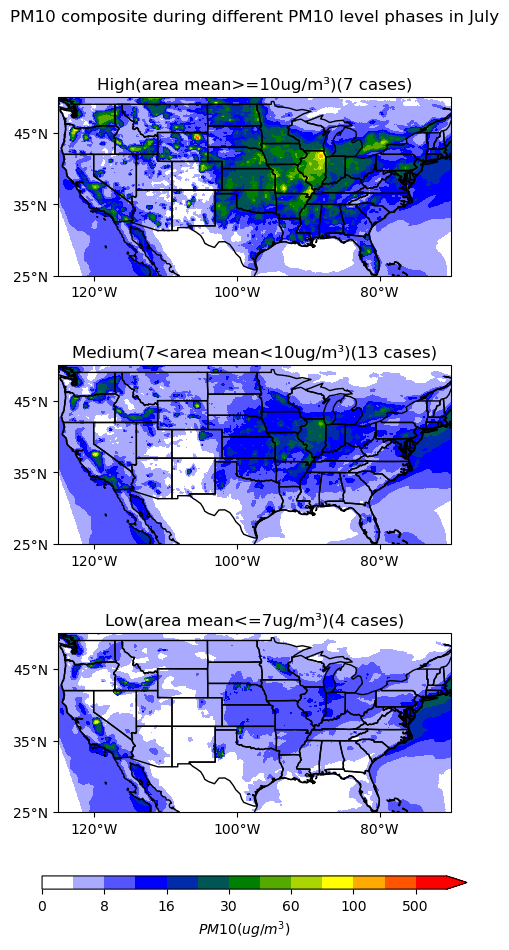

In [19]:
labels=['High','Medium', 'Low']
Expli=[f"(area mean>=10ug/m\N{SUPERSCRIPT THREE})",f"(7<area mean<10ug/m\N{SUPERSCRIPT THREE})",f"(area mean<=7ug/m\N{SUPERSCRIPT THREE})"]


# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=3,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,11))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array (just 3 rows)
axs = axs.flatten()

#Loop over all of the seasons and plot
for i in range(0,3,1):
    
        # Select the season
        data = comp_PM[i]

        # Contour plot
        cs=axs[i].contourf(
                        comp_PM[i]['lon'],
                        comp_PM[i]['lat'],
                        data,
                        clevs,
                        cmap = colormap,
                        norm = norm,
                        extend='max',
                        transform = ccrs.PlateCarree(),
        )
        # Choose lat/lon ranges
        axs[i].set_extent([-125,-70,25,50],crs=ccrs.PlateCarree())

       # Longitude labels
        axs[i].set_xticks(np.arange(-120,-69,20), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(25,51,10), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        
        # Title each subplot with the name 
        axs[i].set_title(labels[i]+Expli[i]+'('+str(counts[i])+' cases'+')')

        # Draw the coastines for each subplot
        axs[i].coastlines()
        axs[i].add_feature(cfeature.STATES.with_scale('110m'))
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.25, 0.18, 0.5, 0.012])

# Draw the colorbar
cbar = fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='$PM10 (ug/m^{3})$')

# Add a big title at the top
plt.suptitle('PM10 composite during different PM10 level phases in July') ;

From the plotting, we can see that the PM10 level at the eastern coast is above 20ug/m3 even in Low composite. Generally, the middle to eastern part of the US and the western coast have higher PM10 levels.
With the area mean increasing, PM10 level arises quickly in the middle part of the US up to above 80ug/m3. While in the other areas, the level increases a little or remains the same.


### Calculate differences

In [20]:
diff=[high_PM['PM10']-medium_PM['PM10'],
      low_PM['PM10']-medium_PM['PM10']]


### Plot differences

Text(0.5, 0.98, 'Composite PM10 Differences of different levels')

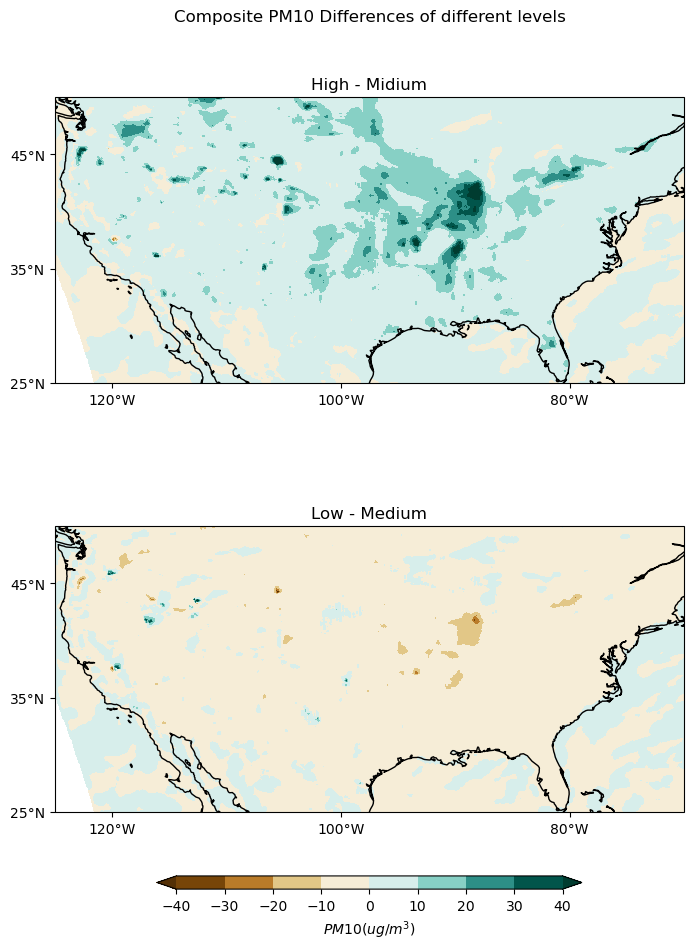

In [21]:
labels=['High - Midium','Low - Medium']
clevs=np.arange(-40,50,10)

# Define the figure and each axis for the 2 rows and 1 columns
fig, axs = plt.subplots(nrows=2,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,11))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs = axs.flatten()

#Loop over all of the seasons and plot
for i in range(0,2,1):

        # Select the season
        data = diff[i]

        # Contour plot
        cs = axs[i].contourf(
                            diff[i]['lon'],
                            diff[i]['lat'],
                            data,
                            clevs,
                            cmap='BrBG',
                            extend='both',
                            transform = ccrs.PlateCarree(),
        )
        # Choose lat/lon ranges
        axs[i].set_extent([-125,-70,25,50],crs=ccrs.PlateCarree())
        
       # Longitude labels
        axs[i].set_xticks(np.arange(-120,-69,20), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(25,51,10), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        
        # Title each subplot with the name of the season
        axs[i].set_title(labels[i])

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.25, 0.18, 0.5, 0.012])

# Draw the colorbar
cbar = fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='$PM10 (ug/m^{3})$')

# Add a big title at the top
plt.suptitle('Composite PM10 Differences of different levels')


### Calculate significance

In [22]:
p = 0.01 # 99% confidence level, or 1% likelihood that the result arose by chance

In [23]:
from scipy.stats import ttest_ind

high_PM_vals   = ds_climo.sel(time=high.dropna(dim='time')['time'])['PM10']
medium_PM_vals = ds_climo.sel(time=medium.dropna(dim='time')['time'])['PM10']
low_PM_vals    = ds_climo.sel(time=low.dropna(dim='time')['time'])['PM10']

high_PM_vals

<xarray.DataArray 'PM10' (time: 7, lat: 351, lon: 801)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) int32 1 19 20 21 22 23 24
  * lat      (lat) float32 15.0 15.1 15.2 15.3 15.4 ... 49.6 49.7 49.8 49.9 50.0
  * lon      (lon) float32 -130.0 -129.9 -129.8 -129.7 ... -50.2 -50.1 -50.0

In [24]:
tstat,pval = ttest_ind(high_PM_vals, 
                medium_PM_vals, 
                equal_var = False)

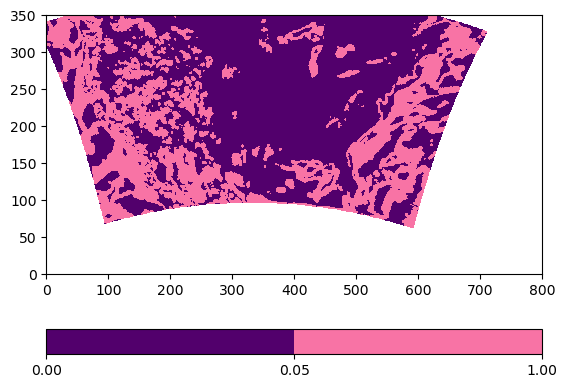

In [31]:
plt.contourf(pval,[0,0.05,1],cmap='RdPu_r') 
plt.colorbar(orientation='horizontal') ;

### Make a mask of where the value is significant

In [26]:
mask_diff = diff[0].where(pval <= p)
mask_diff

<xarray.DataArray 'PM10' (lat: 351, lon: 801)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 15.0 15.1 15.2 15.3 15.4 ... 49.6 49.7 49.8 49.9 50.0
  * lon      (lon) float32 -130.0 -129.9 -129.8 -129.7 ... -50.2 -50.1 -50.0

### Plot our difference between composites and also mark where its significant

Text(0.5, 0.98, 'Composite PM10 Differences High - Medium')

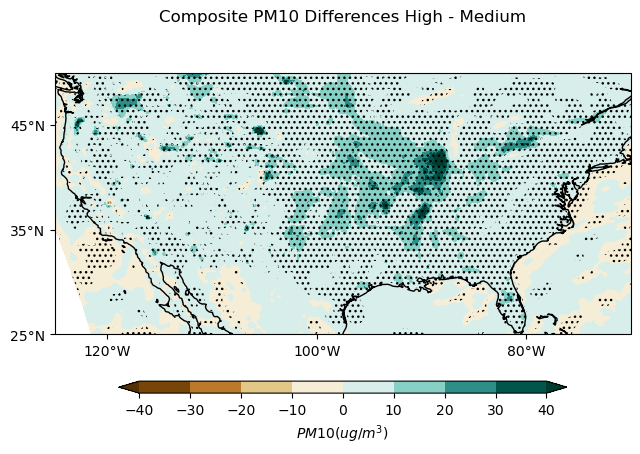

In [27]:
labels=['High vs. Medium']
clevs=np.arange(-40,50,10)
hatch_levs=[0]

# Define the figure and each axis for the 1 rows and 1 columns
fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        )

data=diff[0]

# Contour plot
cs = axs.contourf(
                    diff[0]['lon'],
                    diff[0]['lat'],
                    data,
                    clevs,
                    cmap='BrBG',
                    extend='both',
                    transform = ccrs.PlateCarree(),
)
# Choose lat/lon ranges
axs.set_extent([-125,-70,25,50],crs=ccrs.PlateCarree())

# Longitude labels
axs.set_xticks(np.arange(-120,-69,20), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)

# Latitude labels
axs.set_yticks(np.arange(25,51,10), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
axs.yaxis.set_major_formatter(lat_formatter)

# Overlay of stippling
ss=axs.contourf(diff[0]['lon'],diff[0]['lat'],mask_diff,[0,1],
                transform = ccrs.PlateCarree(),colors=['None'],
                hatches=['...',''],extend='both',alpha=0.0)

# Draw the coastines for each subplot
axs.coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.15, 0.18, 0.7, 0.025])

# Draw the colorbar
cbar = fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='$PM10 (ug/m^{3})$')

# Add a big title at the top
plt.suptitle('Composite PM10 Differences High - Medium')